**Bank Marketing Dataset Machine Learning**

Sudarsan "Sudi" Narasimhan

**I. Business Understanding** The core objective of this exercise is to best estimate whether a Portuguese bank's marketing campaign that was conducted through phone calls, would result in a client or customer subscribing to a term deposit. This type of AI/ML classification excercise enables enterprise resources to be better utilized such that the right type of customer is more likely to subscribe. Targeting the wrong customer wastes both time, effort, and investment. By employing such AI techniques, enhances corporate productivity and efficiency.

**II Situation Assessment** Resources employed for this exercise include a UC Irvine Machine Learning Repository dataset with 45211 instances, 16 features, and with no missing data. The goal is to compare the performance of the classifiers (k-nearest neighbors, logistic regression, decision trees, and support vector machines), and thereby assess which type of classification model best identifies whether a customer will subscribe to a term deposit. Metrics that will best identify include accuracy, precision, recall, f1-score among others.

In [1]:
#Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the original dataset
df = pd.read_csv('sample_data/bank-additional-full.csv', sep=';')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
#41118 data values with some categorical and some numeric

In [5]:
# No null values, some variables are categorical, some are numeric. To be passed through the analysis will eventually require either one hot encoding or label encoding across the categorical features.

In [6]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.tail(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
df.shape

(41188, 21)

In [10]:
# 41188 data values across 21 features

**Univariate Analysis**

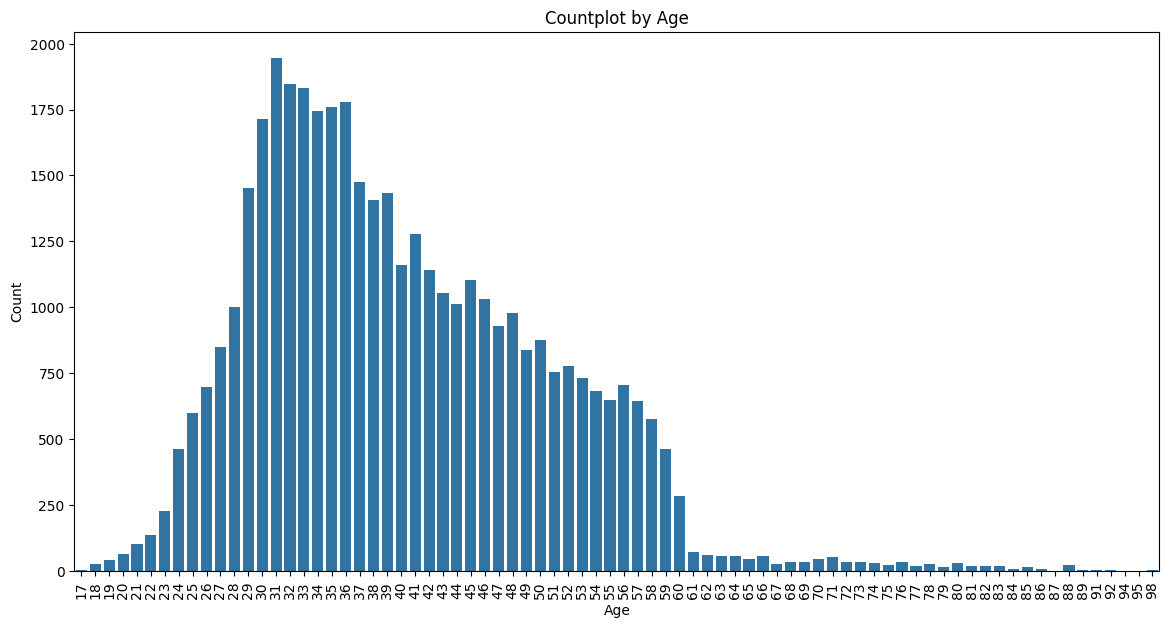

In [11]:
plt.figure(figsize=(14,7))
sns.countplot(x='age', data=df)
plt.xticks(rotation=90)
plt.title('Countplot by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [12]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']

In [13]:
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)
age_count = df['age_group'].value_counts()

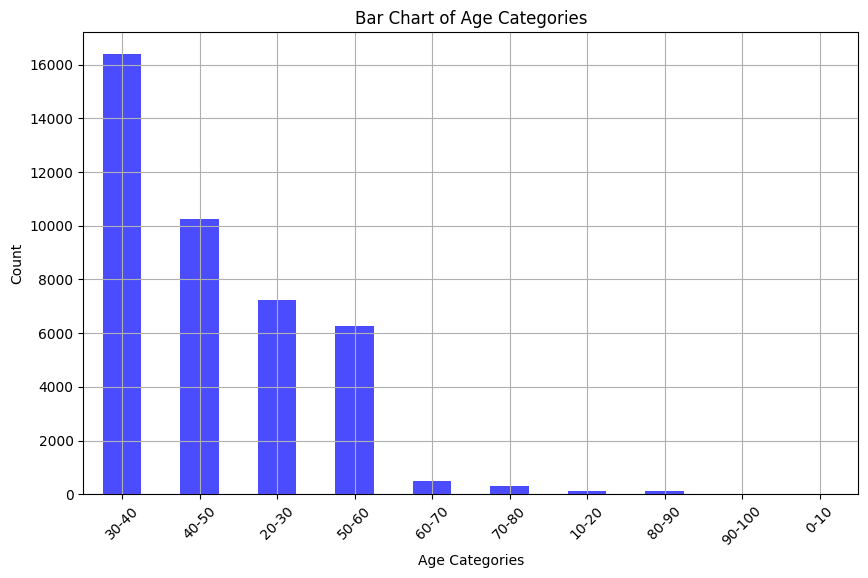

In [14]:

# Plotting the grouped data
plt.figure(figsize=(10, 6))  # Adjust size as needed
age_count.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Bar Chart of Age Categories')
plt.xlabel('Age Categories')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [15]:
#The most number of participants are in the 30-40 age group

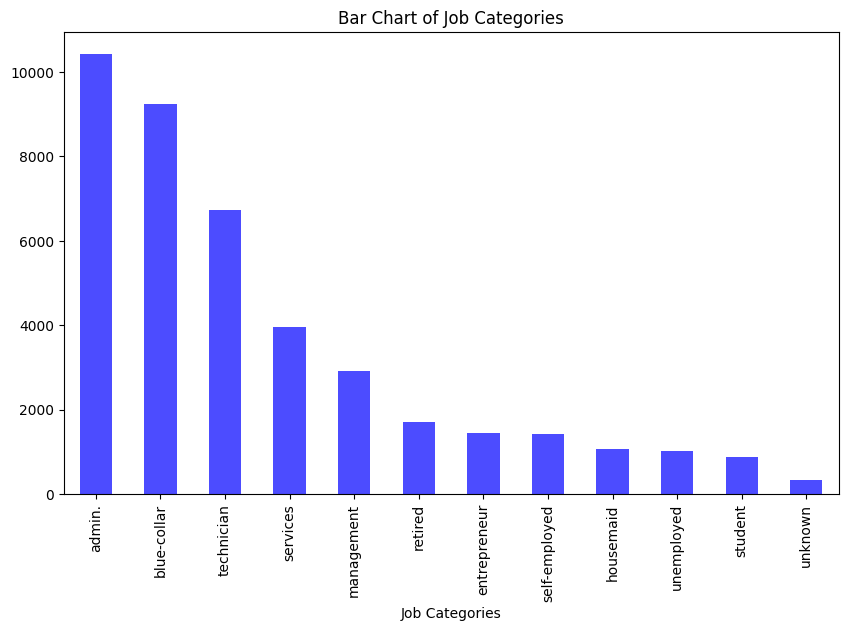

In [16]:
job_count = df['job'].value_counts()
plt.figure(figsize=(10, 6))
job_count.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Bar Chart of Job Categories')
plt.xlabel('Job Categories')
plt.show()

In [17]:
#Highest frequency of participatns are in administration

Text(0.5, 1.0, 'Bar Chart of Marital Categories')

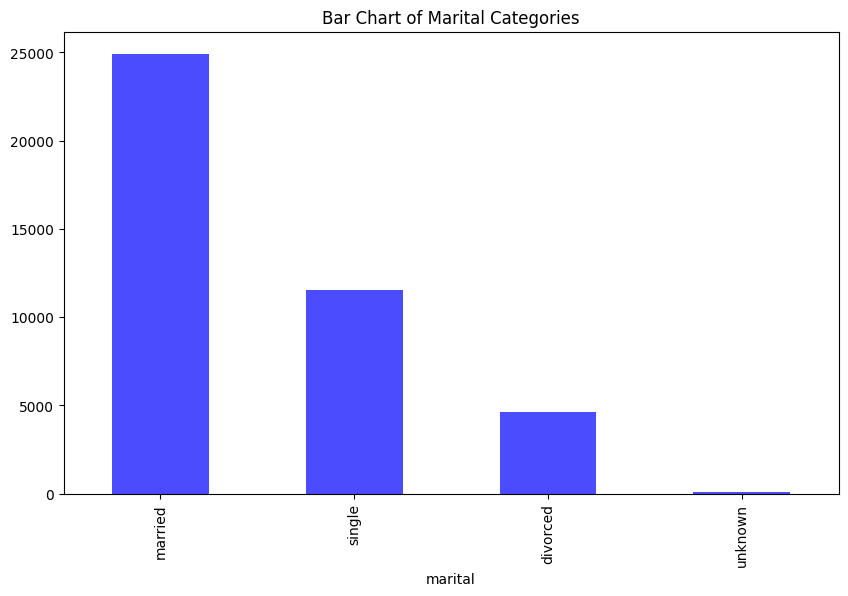

In [18]:
martial_count = df['marital'].value_counts()
plt.figure(figsize=(10, 6))
martial_count.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Bar Chart of Marital Categories')

In [19]:
#Most participants are married, with unknown for the least

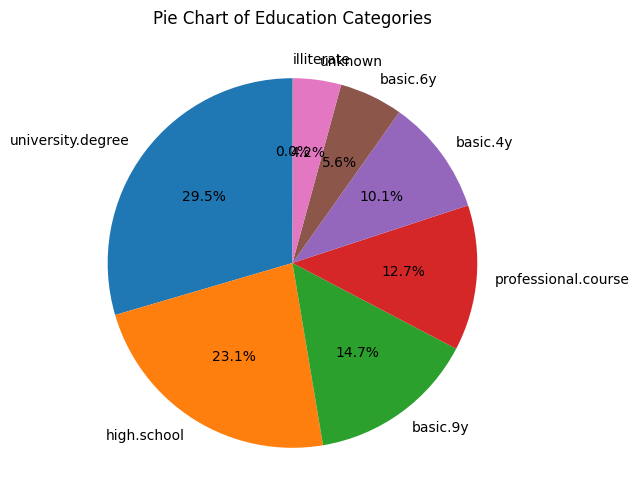

In [20]:
education_count = df['education'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(education_count, labels=education_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Education Categories')
plt.xticks(rotation=45)
plt.show()

Most partipants are highly educated through a university degree or at the very least a high school diploma.

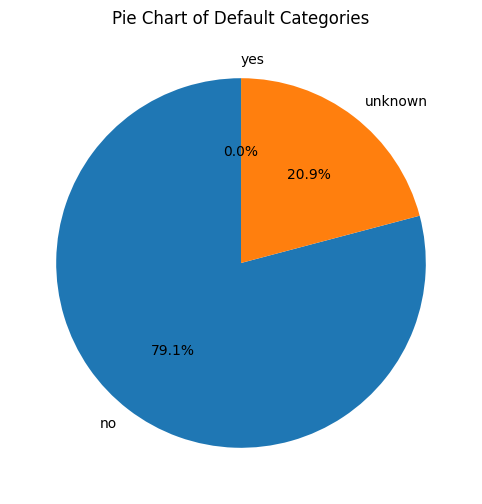

In [21]:
default_count = df['default'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(default_count, labels=default_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Default Categories')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Bar Chart of Housing Categories')

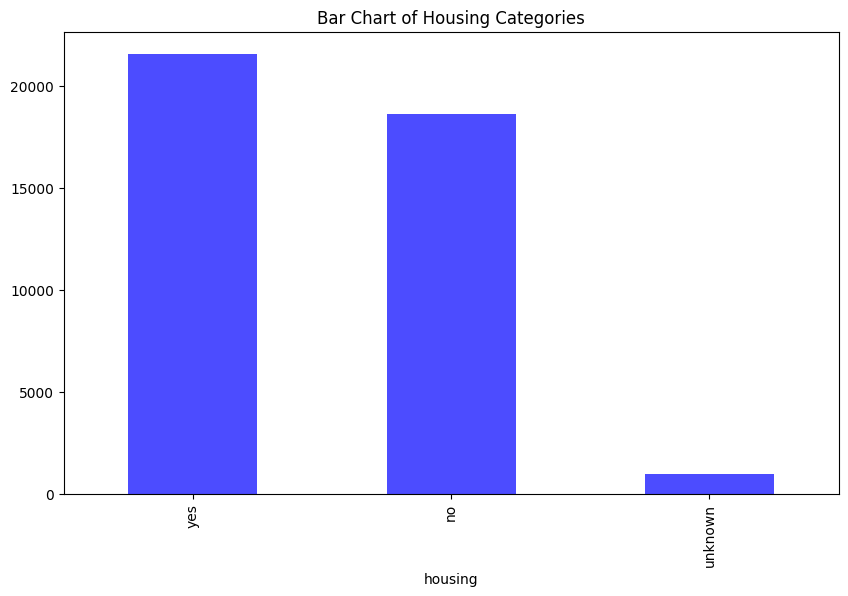

In [22]:
housing_count = df['housing'].value_counts()
plt.figure(figsize=(10, 6))
housing_count.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Bar Chart of Housing Categories')

Most participants already have a housing loan

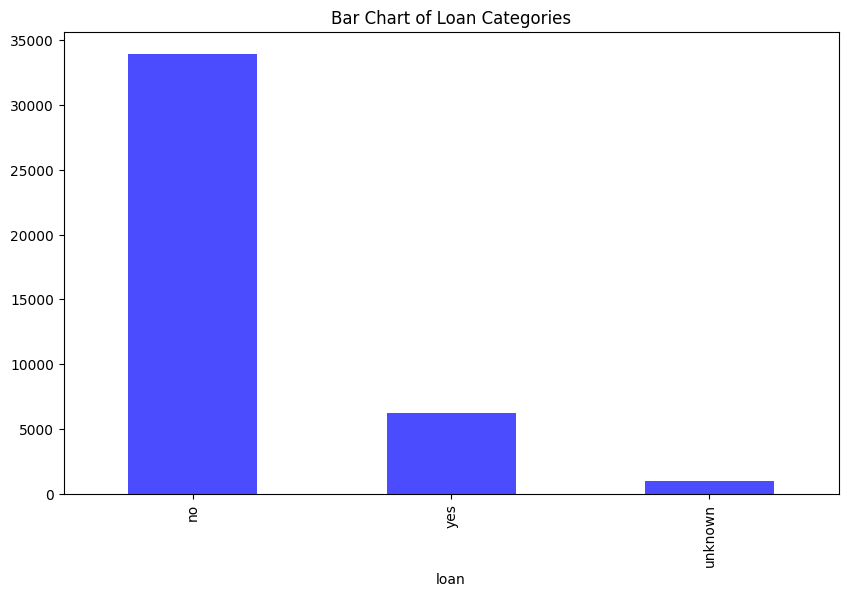

In [23]:
loan_count = df['loan'].value_counts()
plt.figure(figsize=(10, 6))
# Change 'scatter' to 'bar' for a bar chart
loan_count.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Bar Chart of Loan Categories')
plt.show()

Most participants do not have a personal loan

(array([], dtype=float64), [])

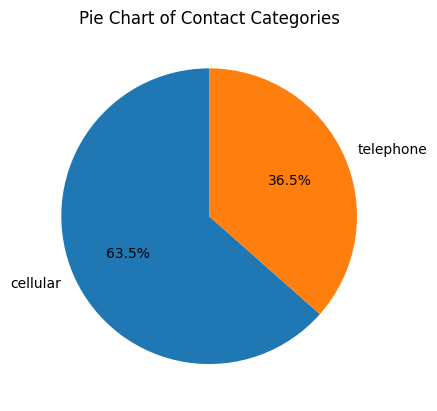

In [24]:
contact_count = df['contact'].value_counts()
plt.pie(contact_count, labels=contact_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Contact Categories')
plt.xticks(rotation=45)

Most interaction occurd through cellular contact or through cell phone calls

Text(0, 0.5, 'Count')

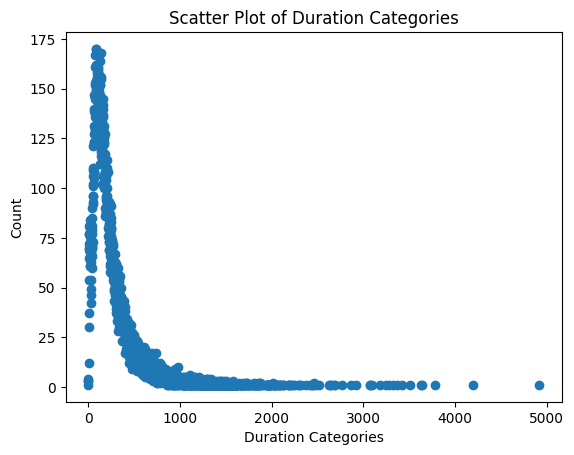

In [25]:
duration_count = df['duration'].value_counts()
plt.scatter(duration_count.index, duration_count.values)
plt.title('Scatter Plot of Duration Categories')
plt.xlabel('Duration Categories')
plt.ylabel('Count')

Text(0.5, 1.0, 'Bar Chart of Loan Categories')

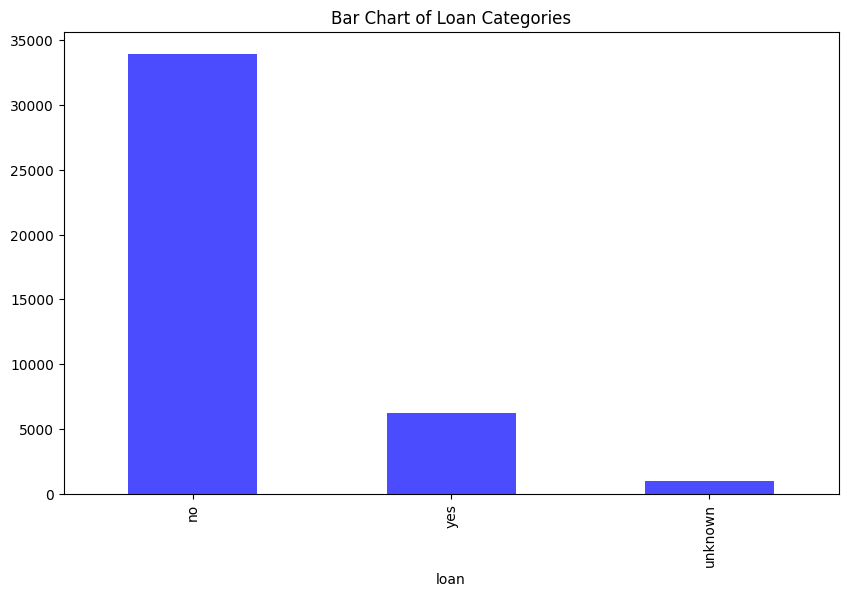

In [26]:
loan_count = df['loan'].value_counts()
plt.figure(figsize=(10, 6))
# Change 'scatter' to 'bar' for a bar chart
loan_count.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Bar Chart of Loan Categories')

Text(0.5, 1.0, 'Bar Chart of Campaign Categories')

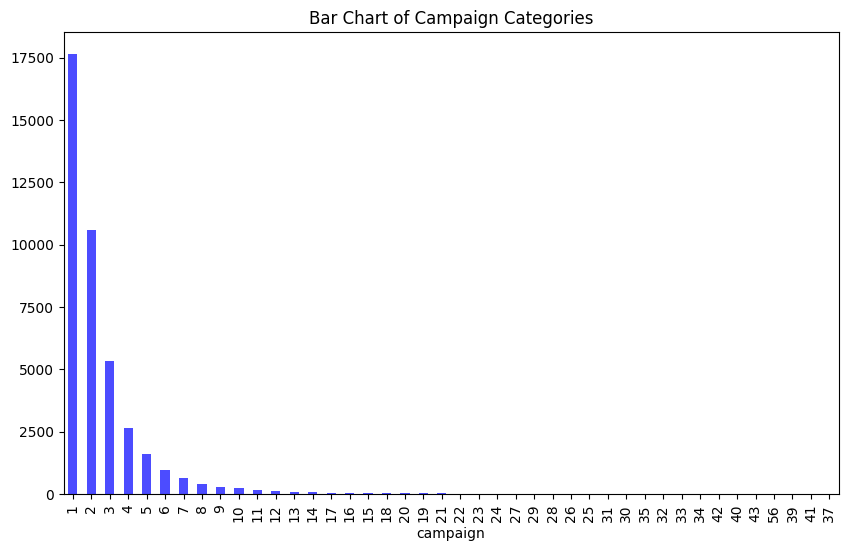

In [27]:
campaign_count = df['campaign'].value_counts()
plt.figure(figsize=(10, 6))
campaign_count.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Bar Chart of Campaign Categories')

Text(0.5, 1.0, 'Bar Chart of Pdays Categories')

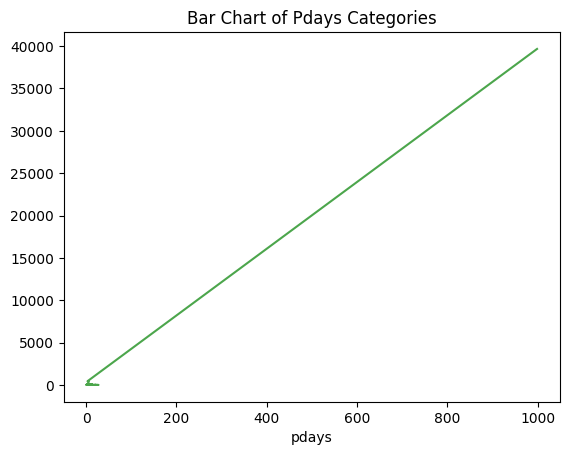

In [28]:
pdays_count = df['pdays'].value_counts()
pdays_count.plot(kind='line', color='green', alpha=0.7)
plt.title('Bar Chart of Pdays Categories')

Number of p-days appears to be an linear line


(array([], dtype=float64), [])

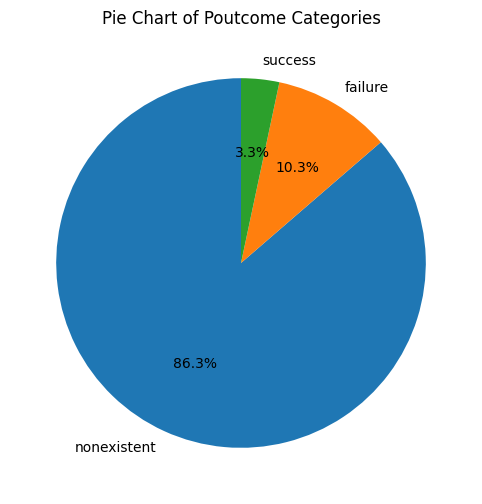

In [29]:
from sys import platlibdir
poutcome_count = df['poutcome'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(poutcome_count, labels=poutcome_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Poutcome Categories')
plt.xticks(rotation=45)

Majority of the p-outcome appears to be non-existent

Text(0.5, 0, 'Poutcome Categories')

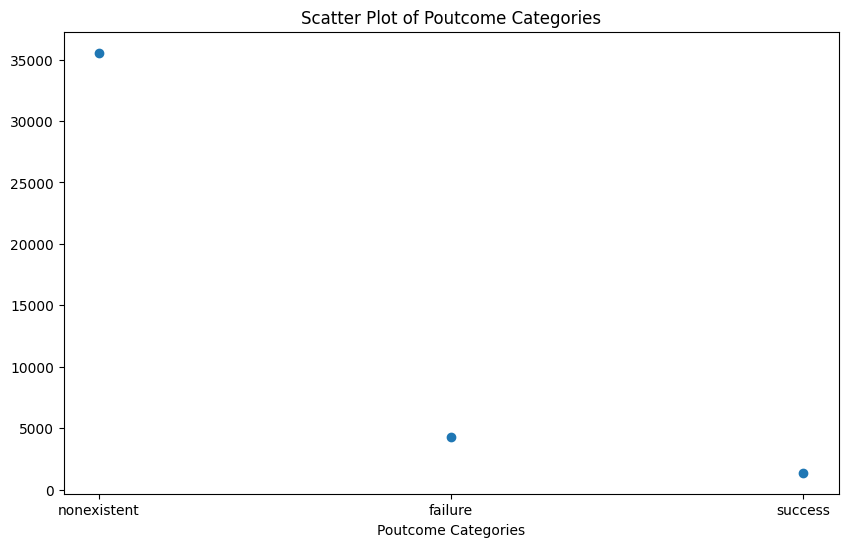

In [30]:
poutcome_count = df['poutcome'].value_counts()
plt.figure(figsize=(10, 6))
plt.scatter(poutcome_count.index, poutcome_count.values)
plt.title('Scatter Plot of Poutcome Categories')
plt.xlabel('Poutcome Categories')

Text(0.5, 1.0, 'Bar Chart of Emp.var.rate Categories')

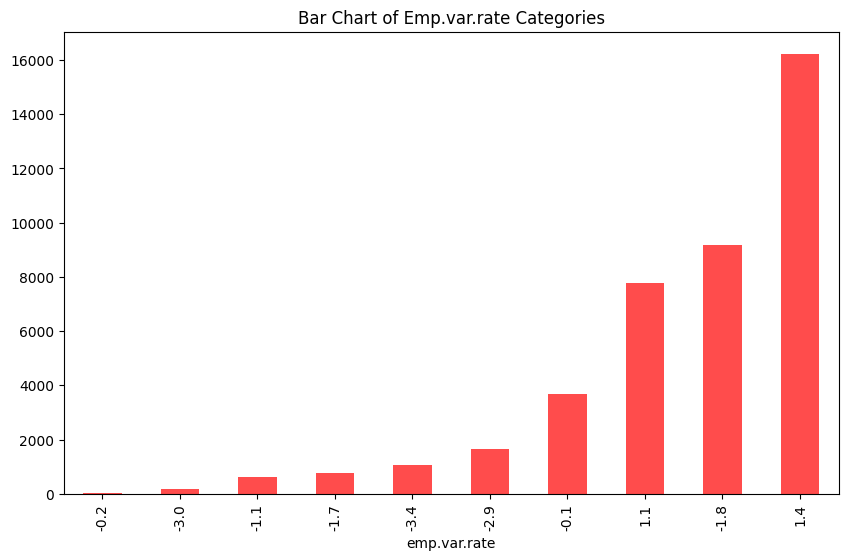

In [31]:
emp_var_rate_count = df['emp.var.rate'].value_counts()
emp_var_rate_sorted = emp_var_rate_count.sort_values()

plt.figure(figsize=(10, 6))
emp_var_rate_sorted.plot(kind='bar', color='red', alpha=0.7)
plt.title('Bar Chart of Emp.var.rate Categories')

Text(0.5, 1.0, 'Bar Chart of Cons.price.idx Categories')

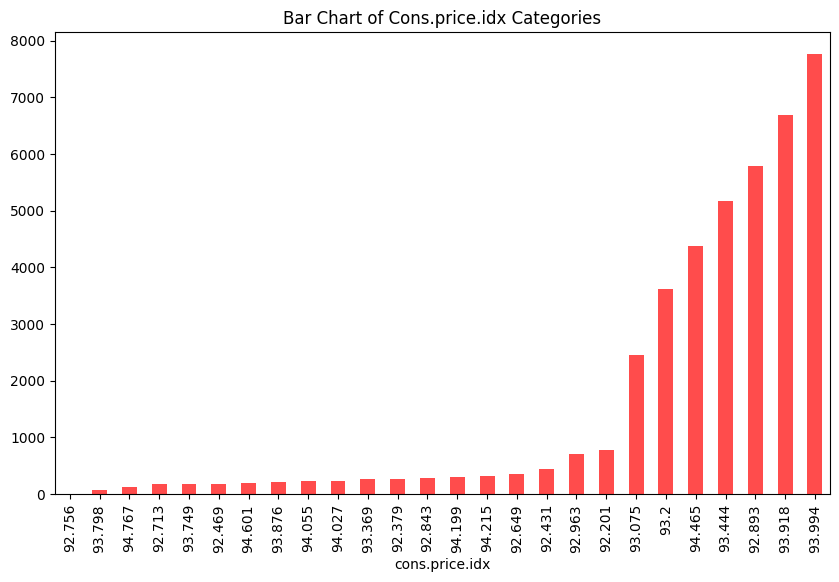

In [32]:
cons_per_idx_count = df['cons.price.idx'].value_counts()
con_per_idx_sorted = cons_per_idx_count.sort_values()

plt.figure(figsize=(10, 6))
con_per_idx_sorted.plot(kind='bar', color='red', alpha=0.7)
plt.title('Bar Chart of Cons.price.idx Categories')
#

Text(0.5, 1.0, 'Bar Chart of Cons.conf.idx Categories')

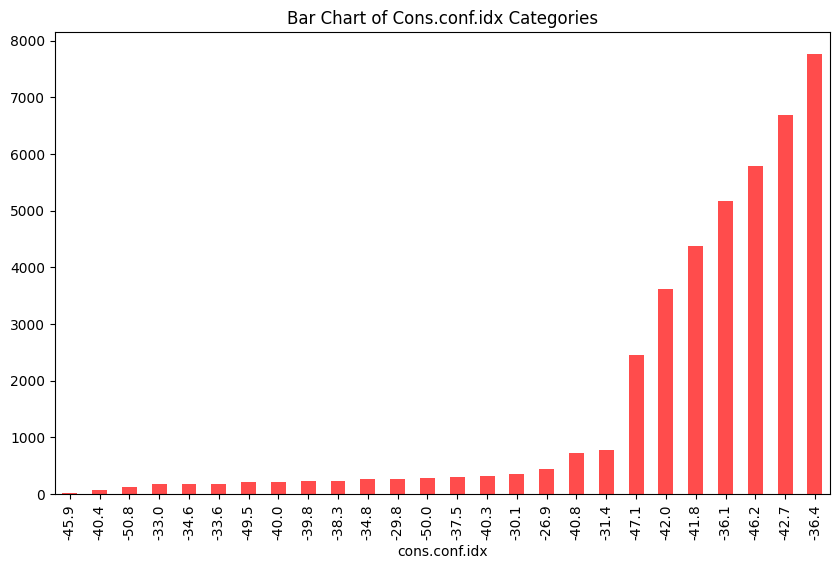

In [33]:
cons_con_conf_count = df['cons.conf.idx'].value_counts()
cons_con_conf_sorted = cons_con_conf_count.sort_values()
plt.figure(figsize=(10, 6))
cons_con_conf_sorted.plot(kind='bar', color='red', alpha=0.7)
plt.title('Bar Chart of Cons.conf.idx Categories')

Text(0.5, 0, 'Euribor3m Categories')

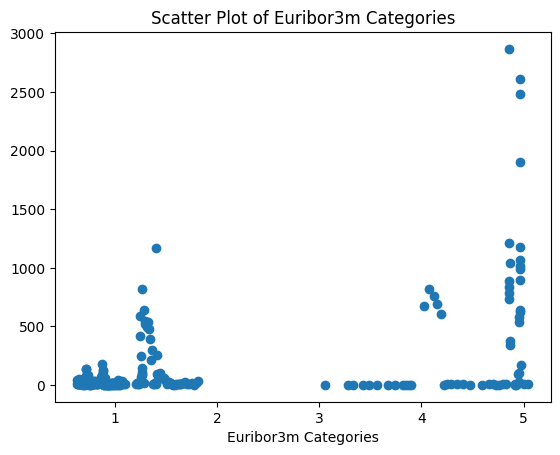

In [34]:
euribor3m_count = df['euribor3m'].value_counts()
euribor3m_sorted = euribor3m_count.sort_values()
plt.scatter(euribor3m_sorted.index, euribor3m_sorted.values)
plt.title('Scatter Plot of Euribor3m Categories')
plt.xlabel('Euribor3m Categories')

<Axes: ylabel='nr.employed'>

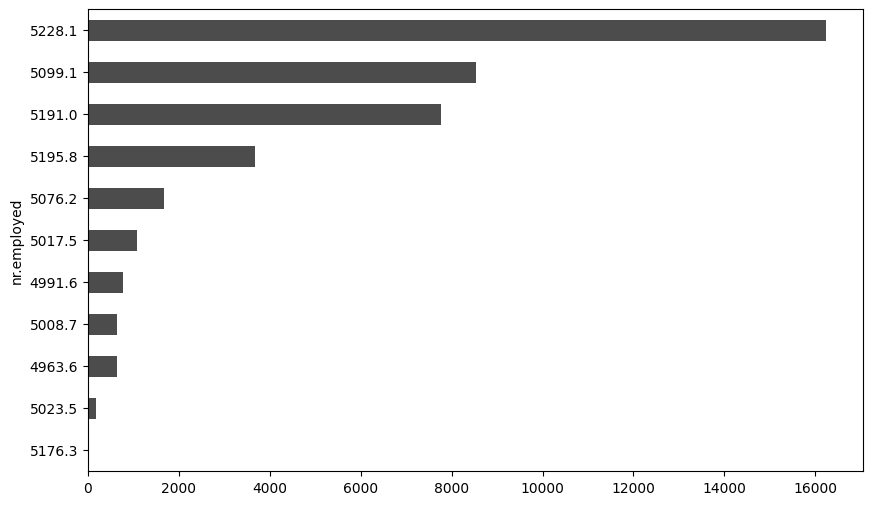

In [35]:
nr_employed_count = df['nr.employed'].value_counts()
nr_employed_sorted = nr_employed_count.sort_values()
plt.figure(figsize=(10, 6))
nr_employed_sorted.plot(kind='barh', color='black', alpha=0.7)

Text(0.5, 0, 'Nr.employed Categories')

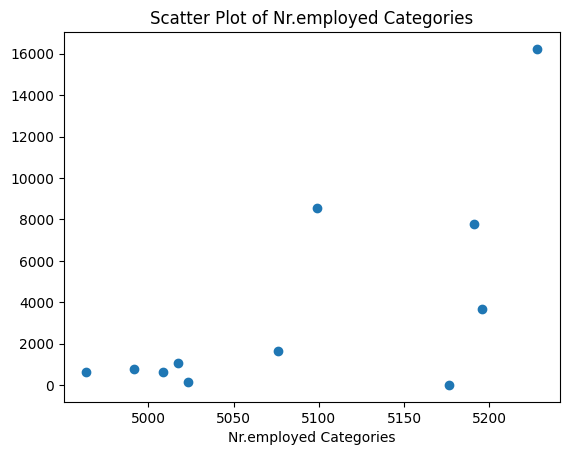

In [36]:
nr_employed_count = df['nr.employed'].value_counts()
nr_employed_sorted = nr_employed_count.sort_values()
plt.scatter(nr_employed_sorted.index, nr_employed_sorted.values)
plt.title('Scatter Plot of Nr.employed Categories')
plt.xlabel('Nr.employed Categories')
#

In [37]:
nr_employed_count = df['nr.employed'].value_counts()
nr_employed_sorted = nr_employed_count.sort_values()
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

(array([], dtype=float64), [])

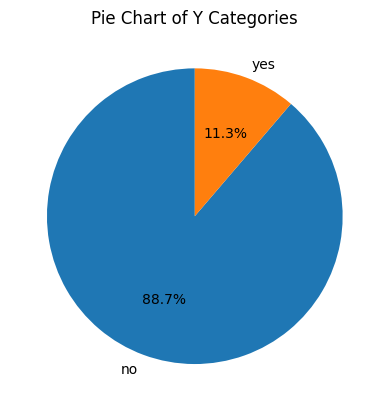

In [38]:
y_count = df['y'].value_counts()
plt.pie(y_count, labels=y_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Y Categories')
plt.xticks(rotation=45)
#

In [39]:
df_le = df.copy()

In [40]:
label_encoders = {}
for column in df_le.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df_le[column] = le.fit_transform(df_le[column])
    label_encoders[column] = le

In [41]:
df_le.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
0,56,3,1,0,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,4
1,57,7,1,3,1,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,4
2,37,7,1,3,0,2,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,2
3,40,0,1,1,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,2
4,56,7,1,3,0,0,2,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,4


In [42]:
df_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

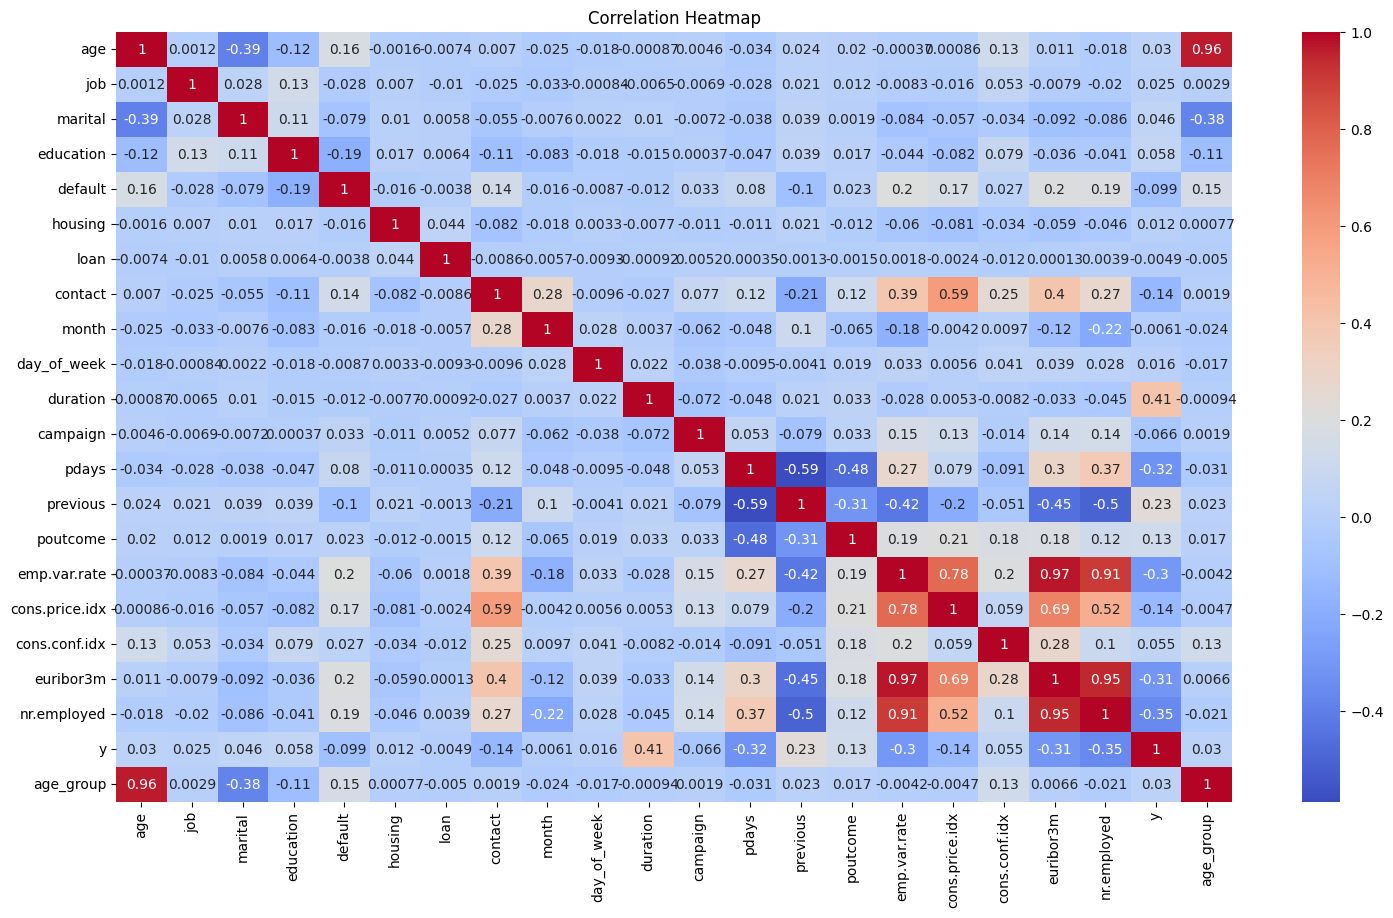

In [43]:
df_le_corr = df_le.corr()
plt.figure(figsize=(18,10))
sns.heatmap(df_le_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [44]:
# Attributes that best align to y - has the client subscribed a term depost -
# duration - last contact in duration in seconds
# pdays - number of contacts performed before this campaign
# previous - number of contacts performed before this campaign and for this client


In [45]:
df_le_drop_v = df_le.drop(['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1)

In [46]:
df_le_drop_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          41188 non-null  int64
 1   job          41188 non-null  int64
 2   marital      41188 non-null  int64
 3   education    41188 non-null  int64
 4   default      41188 non-null  int64
 5   housing      41188 non-null  int64
 6   loan         41188 non-null  int64
 7   contact      41188 non-null  int64
 8   month        41188 non-null  int64
 9   day_of_week  41188 non-null  int64
 10  duration     41188 non-null  int64
 11  campaign     41188 non-null  int64
 12  pdays        41188 non-null  int64
 13  previous     41188 non-null  int64
 14  poutcome     41188 non-null  int64
 15  y            41188 non-null  int64
 16  age_group    41188 non-null  int64
dtypes: int64(17)
memory usage: 5.3 MB


<Axes: >

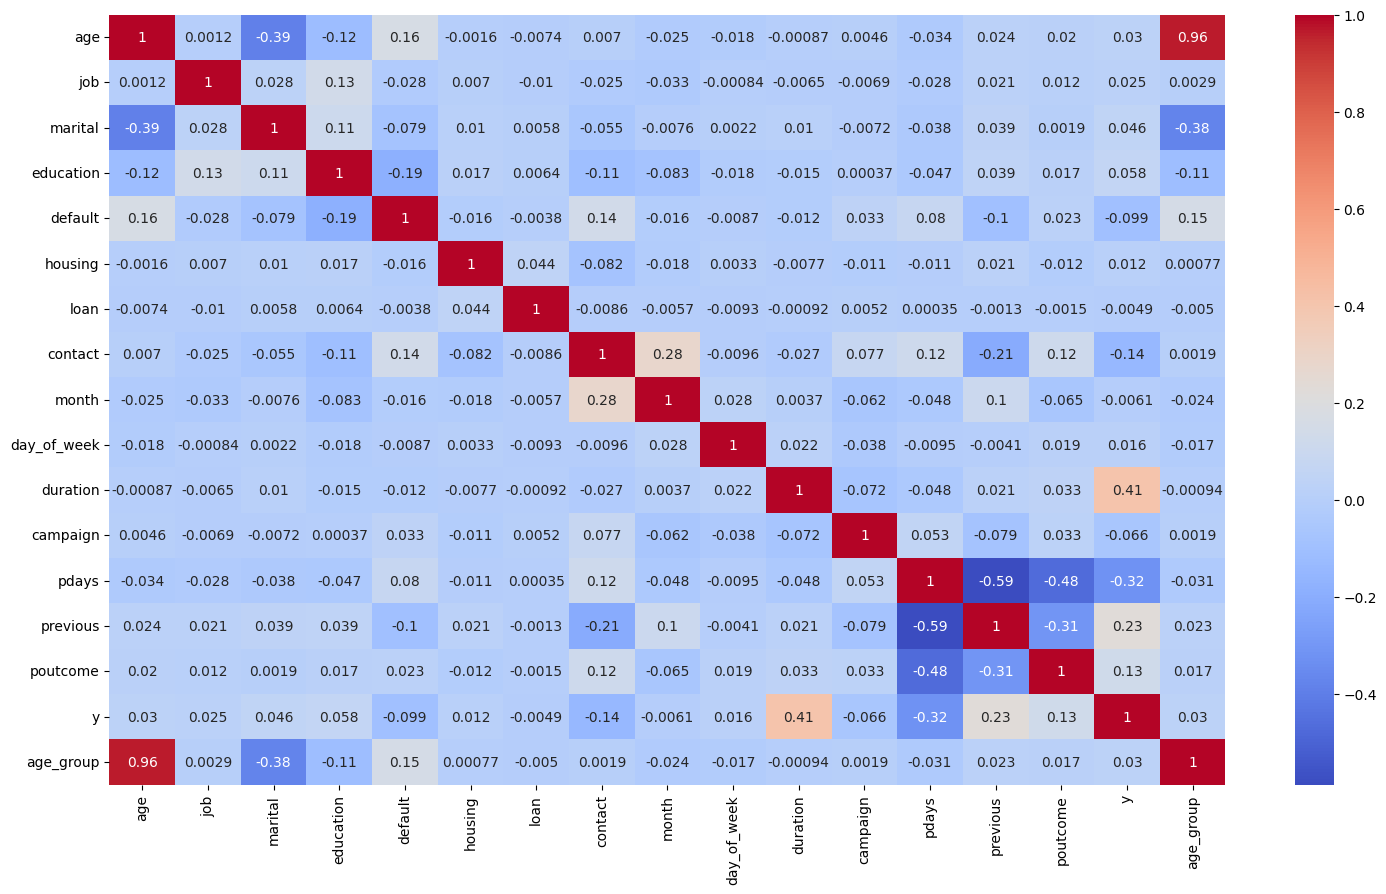

In [47]:
df_le_drop_v_corr = df_le_drop_v.corr()
plt.figure(figsize=(18,10))
sns.heatmap(df_le_drop_v_corr, annot=True, cmap='coolwarm')

**Bivariate Analysis**

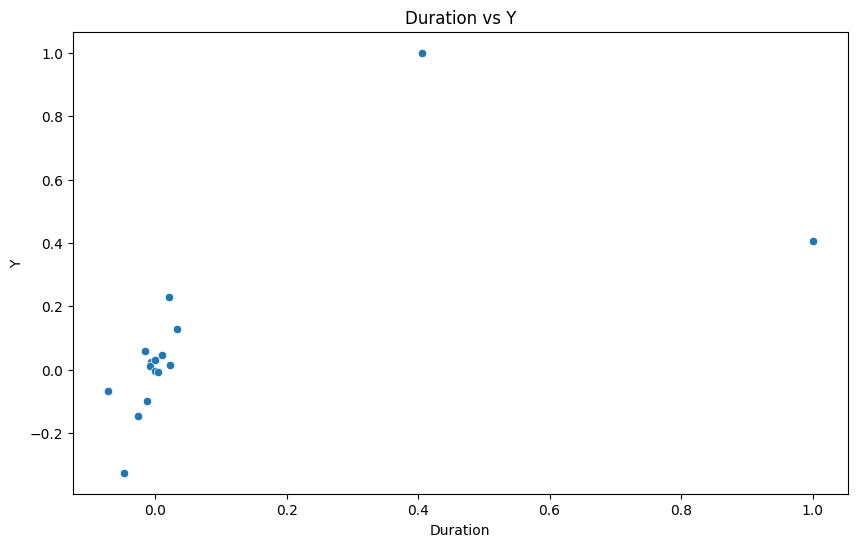

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='y', data=df_le_drop_v_corr, palette='viridis')
plt.title('Duration vs Y')
plt.xlabel('Duration')
plt.ylabel('Y')
plt.show()


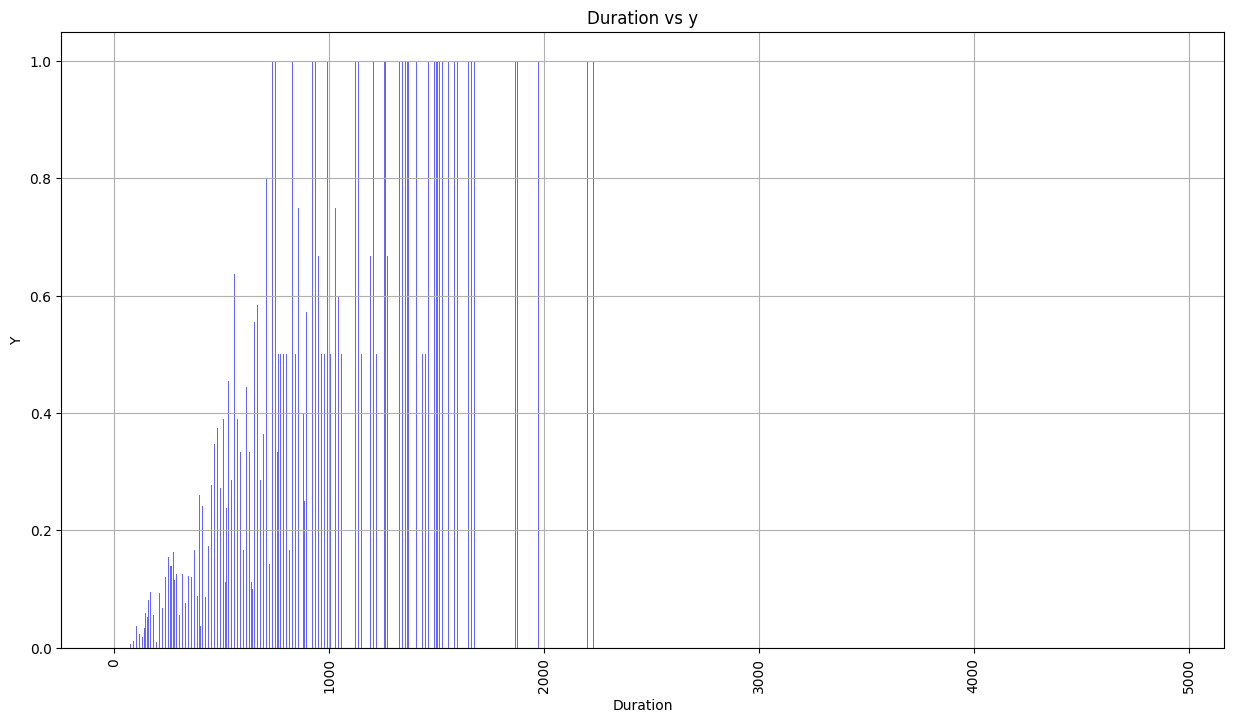

In [49]:
duration_count_y = df_le_drop_v.groupby('duration')['y'].mean().reset_index()
duration_count_y = duration_count_y.sort_values(by='duration')
plt.figure(figsize=(15, 8))
# Use 'width' to control the width of the bars and 'color' for the bar color
plt.bar(duration_count_y['duration'], duration_count_y['y'], width=0.4,  color='blue', alpha=0.6) # Changed 'c' to 'color'
plt.title('Duration vs y')
plt.xlabel('Duration')
plt.ylabel('Y')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

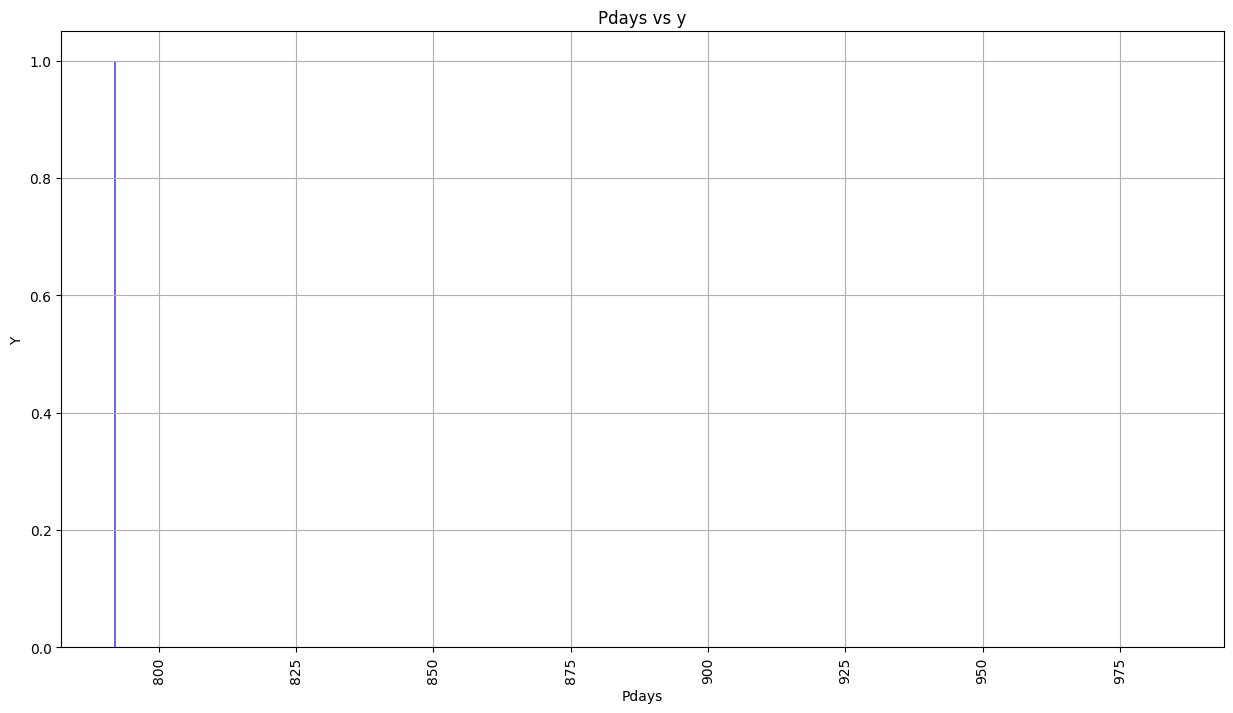

In [50]:
pdays_count_y = df_le_drop_v.groupby('y')['pdays'].mean().reset_index()
pdays_count_y = pdays_count_y.sort_values(by='y')
plt.figure(figsize=(15, 8))
# Use 'width' to control the width of the bars and 'color' for the bar color
plt.bar(pdays_count_y['pdays'], pdays_count_y['y'], width=0.4,  color='blue', alpha=0.6) # Changed 'c' to 'color
plt.title('Pdays vs y')
plt.xlabel('Pdays')
plt.ylabel('Y')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [51]:
X=df_le_drop_v.drop('y', axis=1)
y=df_le_drop_v['y']


In [52]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  # You can tune the number of neighbors
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
y_pred_knn = knn.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


results_knn = { # Use curly braces to define a dictionary
"k-NN: Accuracy": accuracy_score(y_test, y_pred_knn), # Add key-value pairs for each metric
"k-NN: Precision": precision_score(y_test, y_pred_knn),
"k-NN: Recall": recall_score(y_test, y_pred_knn),
"k-NN: F1 Score": f1_score(y_test, y_pred_knn),
"k-NN: ROC AUC Score": roc_auc_score(y_test, knn.predict_proba(X_test)[:,1])
}

print("k-NN Results:")
for metric, value in results_knn.items(): # Iterate over key-value pairs in the dictionary
    print(f"  {metric}: {value:.2f}")




k-NN Results:
  k-NN: Accuracy: 0.90
  k-NN: Precision: 0.60
  k-NN: Recall: 0.32
  k-NN: F1 Score: 0.42
  k-NN: ROC AUC Score: 0.81


In [57]:
print("k-NN Results:")
for metric, value in results_knn.items():
    print(f"  {metric}: {(value *100):.2f}%")


k-NN Results:
  k-NN: Accuracy: 89.83%
  k-NN: Precision: 59.64%
  k-NN: Recall: 32.09%
  k-NN: F1 Score: 41.72%
  k-NN: ROC AUC Score: 80.66%


In [58]:
from sklearn.model_selection import GridSearchCV

param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]})

In [59]:
results = grid_knn.cv_results_
print("All results:")
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Score: {mean_score:.3f} for params: {params}")

All results:
Score: 0.891 for params: {'n_neighbors': 3}
Score: 0.895 for params: {'n_neighbors': 5}
Score: 0.898 for params: {'n_neighbors': 7}
Score: 0.899 for params: {'n_neighbors': 9}


In [60]:
best_params = grid_knn.best_params_
print("Best parameters found:", best_params)
best_score = grid_knn.best_score_
print("Best cross-validation score:", best_score)
best_estimator = grid_knn.best_estimator_
print("Best estimator:", best_estimator)

Best parameters found: {'n_neighbors': 9}
Best cross-validation score: 0.89948406676783
Best estimator: KNeighborsClassifier(n_neighbors=9)


In [61]:
#Running model with n_neighbors=9 as identified by GridSearchCV
knn = KNeighborsClassifier(n_neighbors=9)
start_train_time = time.time()
knn.fit(X_train, y_train)
end_train_time = time.time()

start_test_time = time.time()
y_pred_knn = knn.predict(X_test)
end_test_time = time.time()

knn_train_time = end_train_time - start_train_time
knn_test_time = end_test_time - start_test_time

In [62]:
results_knn_GridSearchCV = {
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'Precision': precision_score(y_test, y_pred_knn),
    'Recall': recall_score(y_test, y_pred_knn),
    'F1 Score': f1_score(y_test, y_pred_knn),
    'ROC AUC': roc_auc_score(y_test, knn.predict_proba(X_test)[:,1]),
    'Train Time': knn_train_time,
    'Test Time': knn_test_time
}
print("K-Nearest Neighbours GridSearch CV Results:")
for metric, value in results_knn_GridSearchCV.items():
    print(f"  {metric}: {value:.2f}")

K-Nearest Neighbours GridSearch CV Results:
  Accuracy: 0.90
  Precision: 0.62
  Recall: 0.30
  F1 Score: 0.40
  ROC AUC: 0.84
  Train Time: 0.00
  Test Time: 0.41


In [63]:
print("K-Nearest Neighbours GridSearch CV Results:")
for metric, value in results_knn_GridSearchCV.items():
    print(f"  {metric}: {(value * 100):.2f}%")

K-Nearest Neighbours GridSearch CV Results:
  Accuracy: 89.97%
  Precision: 62.03%
  Recall: 30.05%
  F1 Score: 40.49%
  ROC AUC: 84.17%
  Train Time: 0.41%
  Test Time: 41.47%


In [64]:
y_pred_knn = grid_knn.predict(X_test)

In [65]:
from sklearn.model_selection import cross_val_score

print("k-NN Cross-Validation Scores:", cross_val_score(KNeighborsClassifier(n_neighbors=9), X, y, cv=5))

k-NN Cross-Validation Scores: [0.89232824 0.88370964 0.86829328 0.87738254 0.83829064]


In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [67]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(cm_knn)

Confusion Matrix:
[[7131  172]
 [ 654  281]]


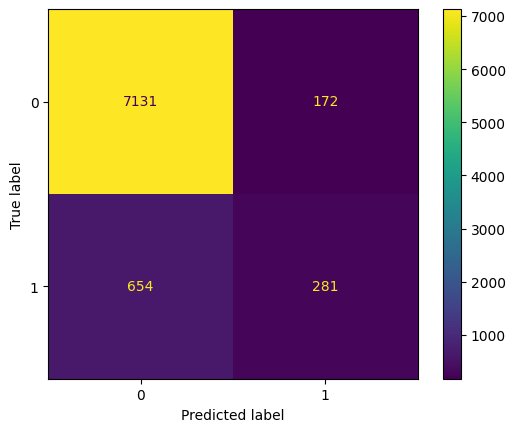

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_knn = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(cm_knn)
disp.plot()

**Logistic Regression**

In [69]:
X=df_le_drop_v.drop('y', axis=1)
y=df_le_drop_v['y']

In [70]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [73]:
y_pred_logreg = logreg.predict(X_test)
y_proba_logreg = logreg.predict_proba

In [74]:
results_log_reg = {
    'Accuracy': accuracy_score(y_test, y_pred_logreg),
    'Precision': precision_score(y_test, y_pred_logreg),
    'Recall': recall_score(y_test, y_pred_logreg),
    'F1 Score': f1_score(y_test, y_pred_logreg),
    'ROC AUC': roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])

}

print("Logistic Regression Results:")
for metric, value in results_log_reg.items():
    print(f"  {metric}: {value:.4f}")

Logistic Regression Results:
  Accuracy: 0.9067
  Precision: 0.6774
  Recall: 0.3390
  F1 Score: 0.4519
  ROC AUC: 0.8887


In [75]:

print("Logistic Regression Results(%):")
for metric, value in results_log_reg.items():
    print(f"  {metric}: {(value*100):.2f}%")

Logistic Regression Results(%):
  Accuracy: 90.67%
  Precision: 67.74%
  Recall: 33.90%
  F1 Score: 45.19%
  ROC AUC: 88.87%


In [76]:
from sklearn.model_selection import GridSearchCV
param_grid_logreg = {'C': [0.1, 1, 10, 50]}
grid_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5)

grid_logreg.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 50]})

In [77]:
results = grid_logreg.cv_results_
print("All results:")
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Score: {mean_score:.3f} for params: {params}")

All results:
Score: 0.905 for params: {'C': 0.1}
Score: 0.905 for params: {'C': 1}
Score: 0.905 for params: {'C': 10}
Score: 0.905 for params: {'C': 50}


In [78]:
best_params = grid_logreg.best_params_
print("Best parameters found:", best_params)
best_score = grid_logreg.best_score_
print("Best cross-validation score:", best_score)
best_estimator = grid_logreg.best_estimator_
print("Best estimator:", best_estimator)

Best parameters found: {'C': 0.1}
Best cross-validation score: 0.9047040971168437
Best estimator: LogisticRegression(C=0.1)


In [79]:
#Rerunning LogisticRegression with optimized hyperparameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
logreg = LogisticRegression(C=0.01, max_iter=1000, random_state=42)

In [81]:
start_logreg_train_time = time.time()
logreg.fit(X_train, y_train)
stop_logreg_train_time = time.time()

In [82]:
start_logreg_test_time = time.time()
y_pred_logreg_GridSearchCV = logreg.predict(X_test)
stop_logreg_test_time = time.time()
y_proba_logreg_GridSearchCV = logreg.predict_proba

In [83]:
results_logreg_GridSearchCV  = {
  '  Accuracy': accuracy_score(y_test, y_pred_logreg_GridSearchCV),
  '  Precision': precision_score(y_test, y_pred_logreg_GridSearchCV),
  '  Recall': recall_score(y_test, y_pred_logreg_GridSearchCV),
  '  F1 Score': f1_score(y_test, y_pred_logreg_GridSearchCV),
  '  ROC AUC': roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1]),
  '  Train Time': stop_logreg_train_time - start_logreg_train_time,
  '  Test Time': stop_logreg_test_time - start_logreg_test_time
}

print("Logistic Regression Results:")
for metric, value in results_logreg_GridSearchCV.items():
    print(f"  {metric}: {value:.2f}")

Logistic Regression Results:
    Accuracy: 0.91
    Precision: 0.69
    Recall: 0.33
    F1 Score: 0.45
    ROC AUC: 0.89
    Train Time: 0.05
    Test Time: 0.00


In [84]:

print("Logistic Regression Results:")
for metric, value in results_logreg_GridSearchCV.items():
    print(f"  {metric}: {(value *100):.2f}%")

Logistic Regression Results:
    Accuracy: 90.70%
    Precision: 68.65%
    Recall: 33.26%
    F1 Score: 44.81%
    ROC AUC: 88.92%
    Train Time: 5.08%
    Test Time: 0.09%


In [85]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.90361738 0.90288905 0.89560573 0.89158674 0.87131237]


Confusion Matrix:
[[7161  142]
 [ 624  311]]


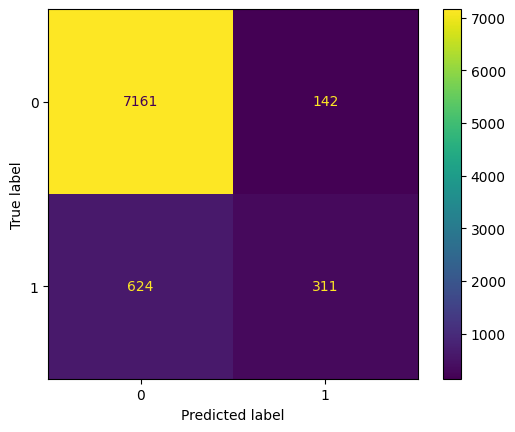

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_logreg = confusion_matrix(y_test, y_pred_logreg_GridSearchCV)
print("Confusion Matrix:")
print(cm_logreg)
disp = ConfusionMatrixDisplay(cm_logreg)
disp.plot()

**Support Vector Machine** (SVM)

In [87]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [88]:
X=df_le_drop_v.drop('y', axis=1)
y=df_le_drop_v['y']

In [89]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [91]:
svm = SVC(probability=True)  # Enable probability estimates for ROC AUC
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)
y_proba_svm = svm.predict_proba(X_test)[:, 1]

In [92]:
results_svm = {
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Precision': precision_score(y_test, y_pred_svm),
    'Recall': recall_score(y_test, y_pred_svm),
    'F1 Score': f1_score(y_test, y_pred_svm),
    'ROC AUC': roc_auc_score(y_test, y_proba_svm)
}

print("SVM Results:")
for metric, value in results_svm.items():
    print(f"  {metric}: {value:.2f}")


SVM Results:
  Accuracy: 0.91
  Precision: 0.68
  Recall: 0.29
  F1 Score: 0.41
  ROC AUC: 0.84


In [93]:
print("SVM Results:")
for metric, value in results_svm.items():
    print(f"  {metric}: {(value *100):.2f}%")

SVM Results:
  Accuracy: 90.54%
  Precision: 68.39%
  Recall: 29.45%
  F1 Score: 41.17%
  ROC AUC: 84.00%


In [94]:
X=df_le_drop_v.drop('y', axis=1)
y=df_le_drop_v['y']

In [95]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [97]:
sample_size = 0.15
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=sample_size, random_state=42)

In [98]:
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': [0.001, 0.01, 0.1],  # Kernel coefficient
    'kernel': ['linear', 'rbf']  # Kernel type
}

In [99]:
grid_search_SVM = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

In [100]:

grid_search_SVM.fit(X_train_sample, y_train_sample)


GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [101]:

y_pred_svm_GridSearchCV = svm.predict(X_test)
y_proba_svm_GridSearchCV = svm.predict_proba

In [102]:
results_svm_GridSearchCV  = {
  '  Accuracy': accuracy_score(y_test, y_pred_svm_GridSearchCV),
  '  Precision': precision_score(y_test, y_pred_svm_GridSearchCV),
  '  Recall': recall_score(y_test, y_pred_svm_GridSearchCV),
  '  F1 Score': f1_score(y_test, y_pred_svm_GridSearchCV),
  '  ROC AUC': roc_auc_score(y_test, svm.predict_proba(X_test)[:,1])
}

In [103]:
print("SVM Results:")
for metric, value in results_svm_GridSearchCV.items():
    print(f"  {metric}: {value:.2f}")

SVM Results:
    Accuracy: 0.91
    Precision: 0.68
    Recall: 0.29
    F1 Score: 0.41
    ROC AUC: 0.84


In [104]:
print("SVM Results:")
for metric, value in results_svm_GridSearchCV.items():
    print(f"  {metric}: {(value *100):.2f}%")

SVM Results:
    Accuracy: 90.54%
    Precision: 68.39%
    Recall: 29.45%
    F1 Score: 41.17%
    ROC AUC: 84.00%


In [105]:
svm_cv_scores = cross_val_score(svm, X_train, y_train, cv=5)

In [106]:
best_params = grid_search_SVM.best_params_
print("Best parameters found:", best_params)
best_score = grid_search_SVM.best_score_
print("Best cross-validation score:", best_score)
best_estimator = grid_search_SVM.best_estimator_
print("Best estimator:", best_estimator)

Best parameters found: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.9051809034467995
Best estimator: SVC(C=10, gamma=0.01, probability=True)


In [107]:
#Rerunning based on best hyper parameters


In [108]:
param_grid = {
    'C': [10],  # Regularization parameter
    'gamma': [0.01],  # Kernel coefficient
    'kernel': [ 'rbf']  # Kernel type
}

In [109]:
grid_search_SVM = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

In [110]:
start_gs_train_time = time.time()
grid_search_SVM.fit(X_train_sample, y_train_sample)
end_gs_train_time = time.time()

In [111]:
start_gs_test_time = time.time()
y_pred_svm_GridSearchCV = svm.predict(X_test)
end_gs_test_time = time.time()
y_proba_svm_GridSearchCV = svm.predict_proba

In [112]:
results_svm_GridSearchCV  = {
  '  Accuracy': accuracy_score(y_test, y_pred_svm_GridSearchCV),
  '  Precision': precision_score(y_test, y_pred_svm_GridSearchCV),
  '  Recall': recall_score(y_test, y_pred_svm_GridSearchCV),
  '  F1 Score': f1_score(y_test, y_pred_svm_GridSearchCV),
  '  ROC AUC': roc_auc_score(y_test, svm.predict_proba(X_test)[:,1]),
  '  Train Time': end_gs_train_time - start_gs_train_time,
  '  Test Time': end_gs_test_time - start_gs_test_time
}

In [113]:
print("SVM Results:")
for metric, value in results_svm_GridSearchCV.items():
    print(f"  {metric}: {value:.2f}")

SVM Results:
    Accuracy: 0.91
    Precision: 0.68
    Recall: 0.29
    F1 Score: 0.41
    ROC AUC: 0.84
    Train Time: 5.32
    Test Time: 4.52


In [114]:
print("SVM Results:")
for metric, value in results_svm_GridSearchCV.items():
    print(f"  {metric}: {(value *100):.2f}%")

SVM Results:
    Accuracy: 90.54%
    Precision: 68.39%
    Recall: 29.45%
    F1 Score: 41.17%
    ROC AUC: 84.00%
    Train Time: 532.12%
    Test Time: 451.68%


Confusion Matrix:
[[10779   189]
 [  980   409]]


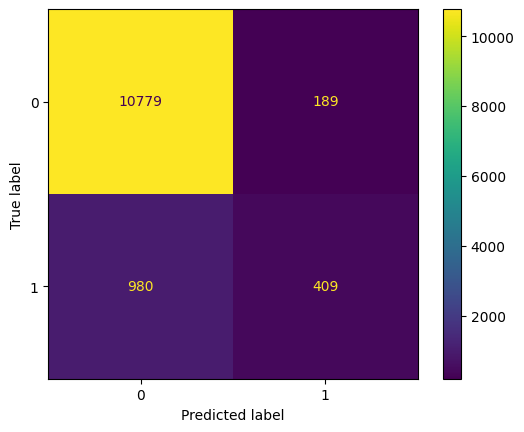

In [115]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_svm = confusion_matrix(y_test, y_pred_svm_GridSearchCV)
print("Confusion Matrix:")
print(cm_svm)
disp = ConfusionMatrixDisplay(cm_svm)
disp.plot()

**Decision Trees**

In [116]:
X=df_le_drop_v.drop('y', axis=1)
y=df_le_drop_v['y']

In [117]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [118]:
ds = DecisionTreeClassifier()

In [119]:
ds.fit(X_train, y_train)

DecisionTreeClassifier()

In [120]:
y_pred_ds = ds.predict(X_test)
y_proba_ds = ds.predict_proba

In [121]:
results_ds = {
    'Accuracy': accuracy_score(y_test, y_pred_ds),
    'Precision': precision_score(y_test, y_pred_ds),
    'Recall': recall_score(y_test, y_pred_ds),
    'F1 Score': f1_score(y_test, y_pred_ds),
    'ROC AUC': roc_auc_score(y_test, ds.predict_proba(X_test)[:,1])
}

In [122]:
print("Decision Tree Results:")
for metric, value in results_ds.items(): # Iterate over key-value pairs in the dictionary
    print(f"  {metric}: {value:.2f}")

Decision Tree Results:
  Accuracy: 0.87
  Precision: 0.44
  Recall: 0.45
  F1 Score: 0.44
  ROC AUC: 0.69


In [123]:
print("Decision Tree Results:")
for metric, value in results_ds.items(): # Iterate over key-value pairs in the dictionary
    print(f"  {metric}: {(value*100):.2f}%")

Decision Tree Results:
  Accuracy: 87.31%
  Precision: 43.75%
  Recall: 45.07%
  F1 Score: 44.40%
  ROC AUC: 68.86%


In [124]:
#Running gridsearchcv for optimizing hyperparameters for Decision Tree Results

In [125]:
X=df_le_drop_v.drop('y', axis=1)
y=df_le_drop_v['y']

In [126]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [127]:
ds = DecisionTreeClassifier()

In [128]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [129]:
grid_search_ds = GridSearchCV(estimator=ds,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,  # Number of folds in cross-validation
                           verbose=1,
                           n_jobs=-1)

In [130]:
start_ds_train_time = time.time()
grid_search_ds.fit(X_train, y_train)
end_ds_train_time = time.time()

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [131]:
start_ds_test_time = time.time()
y_pred_ds_GridSearchCV = grid_search_ds.predict(X_test)
end_ds_test_time = time.time()
y_proba_ds_GridSearchCV = grid_search_ds.predict_proba

In [132]:
results_ds_GridSearchCV  = {
  '  Accuracy': accuracy_score(y_test, y_pred_ds_GridSearchCV),
  '  Precision': precision_score(y_test, y_pred_ds_GridSearchCV),
  '  Recall': recall_score(y_test, y_pred_ds_GridSearchCV),
  '  F1 Score': f1_score(y_test, y_pred_ds_GridSearchCV),
  '  ROC AUC': roc_auc_score(y_test, y_proba_ds_GridSearchCV(X_test)[:,1]),
  '  Train Time': end_ds_train_time - start_ds_train_time,
  '  Test Time': end_ds_test_time - start_ds_test_time
}

In [133]:
print("Decision Tree Grid Search Results:")
for metric, value in results_ds_GridSearchCV.items():
    print(f"  {metric}: {value:.2f}")

Decision Tree Grid Search Results:
    Accuracy: 0.90
    Precision: 0.62
    Recall: 0.38
    F1 Score: 0.47
    ROC AUC: 0.88
    Train Time: 10.44
    Test Time: 0.00


In [134]:
print("Decision Tree Grid Search Results:")
for metric, value in results_ds_GridSearchCV.items():
    print(f"  {metric}: {(value*100):.2f}%")

Decision Tree Grid Search Results:
    Accuracy: 90.41%
    Precision: 62.09%
    Recall: 37.72%
    F1 Score: 46.93%
    ROC AUC: 88.12%
    Train Time: 1044.12%
    Test Time: 0.41%


In [135]:
best_params = grid_search_ds.best_params_
print("Best parameters found:", best_params)
best_score = grid_search_ds.best_score_
print("Best cross-validation score:", best_score)
best_estimator = grid_search_ds.best_estimator_
print("Best estimator:", best_estimator)

Best parameters found: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validation score: 0.9047901088524956
Best estimator: DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10)


In [136]:
#Running Decsion Tree based on the most optimal values

In [137]:
X=df_le_drop_v.drop('y', axis=1)
y=df_le_drop_v['y']

In [138]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [139]:
ds = DecisionTreeClassifier()

In [140]:
param_grid = {
    'criterion': ['entropy'],
    'max_depth': [ 10],
    'min_samples_split': [5],
    'min_samples_leaf': [4]
}

In [141]:
grid_search_ds = GridSearchCV(estimator=ds,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,  # Number of folds in cross-validation
                           verbose=1,
                           n_jobs=-1)

In [142]:
start_ds_train_time = time.time()
grid_search_ds.fit(X_train, y_train)
end_ds_train_time = time.time()

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [143]:
start_ds_test_time = time.time()
y_pred_ds_GridSearchCV = grid_search_ds.predict(X_test)
end_ds_test_time = time.time()
y_proba_ds_GridSearchCV = grid_search_ds.predict_proba

In [144]:
results_ds_GridSearchCV  = {
  '  Accuracy': accuracy_score(y_test, y_pred_ds_GridSearchCV),
  '  Precision': precision_score(y_test, y_pred_ds_GridSearchCV),
  '  Recall': recall_score(y_test, y_pred_ds_GridSearchCV),
  '  F1 Score': f1_score(y_test, y_pred_ds_GridSearchCV),
  '  ROC AUC': roc_auc_score(y_test, y_proba_ds_GridSearchCV(X_test)[:,1]),
  '  Train Time': end_ds_train_time - start_ds_train_time,
  '  Test Time': end_ds_test_time - start_ds_test_time
}

In [145]:
print("Decision Tree Grid Search Results:")
for metric, value in results_ds_GridSearchCV.items():
    print(f"  {metric}: {value:.2f}")

Decision Tree Grid Search Results:
    Accuracy: 0.90
    Precision: 0.62
    Recall: 0.37
    F1 Score: 0.46
    ROC AUC: 0.88
    Train Time: 0.36
    Test Time: 0.00


In [146]:
# @title Default title text
print("Decision Tree Grid Search Results:")
for metric, value in results_ds_GridSearchCV.items():
    print(f"  {metric}: {(value*100):.2f}%")

Decision Tree Grid Search Results:
    Accuracy: 90.39%
    Precision: 62.32%
    Recall: 36.79%
    F1 Score: 46.27%
    ROC AUC: 87.91%
    Train Time: 35.86%
    Test Time: 0.28%


Confusion Matrix:
[[10659   309]
 [  878   511]]


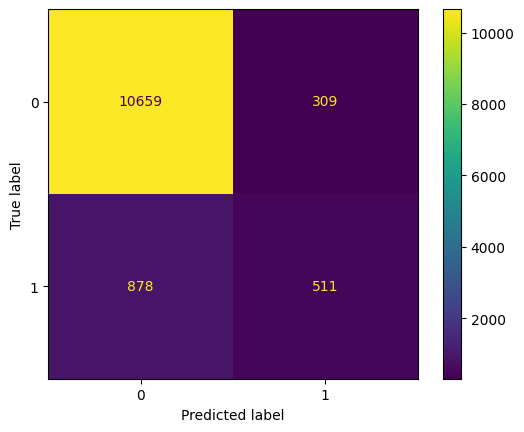

In [147]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_ds = confusion_matrix(y_test, y_pred_ds_GridSearchCV)
print("Confusion Matrix:")
print(cm_ds)
disp = ConfusionMatrixDisplay(cm_ds)
disp.plot()